In [1]:
from __future__ import division

import gym
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import tensorflow.contrib.slim as slim

import trackpy as tp
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import scipy.misc
import os
%matplotlib inline
from trackpy.predict import NearestVelocityPredict

import cv2

In [2]:
import pdb
from time import sleep

import tensorflow.python.platform
from tensorflow.python.platform import gfile

from PIL import Image
import re

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelBinarizer

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier

In [3]:
from piaget import Point, Mover, MoverTracker, FramePair, Box, Categorizer
from piaget import init_env, play

In [171]:
random_seed = 1

In [172]:
np.random.seed(random_seed)
#env = gym.make('MsPacman-v0'); num_wait_steps=100;
#env = gym.make('Breakout-v0'); num_wait_steps = 1;
env = gym.make('Assault-v0'); num_wait_steps = 1;

[2017-05-16 16:45:21,912] Making new env: Assault-v0
/Users/robertfriel/Documents/neural_networks/gym/gym/envs/registration.py:17: DeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [173]:
import matplotlib.colors as mcolors
box_colors_rgb = np.array([mcolors.hex2color(v) for v in mcolors.cnames.values()]).reshape((1,147, 3))
box_colors_hsv = mcolors.rgb_to_hsv(box_colors_rgb)
good_indices = (box_colors_hsv[0][:,1] > 0.5) & (box_colors_hsv[0][:,2] < 0.8)

box_colors = box_colors_rgb[0][good_indices]

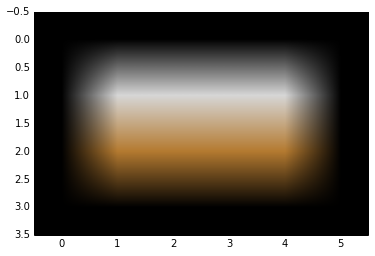

In [496]:
finder = fp[1].finder
plt.imshow(finder.mover_boxes[1][1].img)

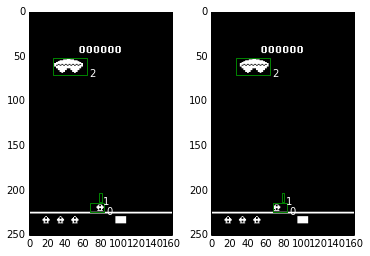

Join (0,), Shift [0.0, -6.0], Score 0.0
Join (1,), Shift [5.0, 1.0], Score 1
Join (2,), Shift [-0.0, 4.0], Score 0.0
Join (0, 1), Shift [0.0, -6.0], Score 0.333333333333
Join (0, 2), Shift [-0.0, 4.0], Score 0.587220219515
Join (1, 2), Shift [-0.0, 4.0], Score 0.218217890236
Join (0, 1, 2), Shift [-0.0, 4.0], Score 0.587220219515

Starting . . . 


self.cnt_best_params: {}
len(self.cnts): 3
winner: 0
winner params: [(0,), [0.0, -6.0]]
forbidden_inds: set([0])
cnt_scores_remaining :{0: [0.0, 0.33333333333333331, 0.58722021951470349, 0.58722021951470349], 1: [1, 0.33333333333333331, 0.21821789023599239, 0.58722021951470349], 2: [0.0, 0.58722021951470349, 0.21821789023599239, 0.58722021951470349]}

cnt_score_params_remaining :{0: [[(0,), [0.0, -6.0]], [(0, 1), [0.0, -6.0]], [(0, 2), [-0.0, 4.0]], [(0, 1, 2), [-0.0, 4.0]]], 1: [[(1,), [5.0, 1.0]], [(0, 1), [0.0, -6.0]], [(1, 2), [-0.0, 4.0]], [(0, 1, 2), [-0.0, 4.0]]], 2: [[(2,), [-0.0, 4.0]], [(0, 2), [-0.0, 4.0]], [(1, 2), [-0.0, 4.0]], 

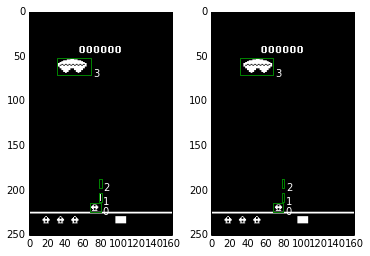

Join (0,), Shift [-0.0, 2.0], Score 0.0
Join (1,), Shift [5.0, 1.0], Score 1
Join (2,), Shift [5.0, 1.0], Score 1
Join (3,), Shift [-0.0, 4.0], Score 0.0
Join (0, 1), Shift [0.0, 2.0], Score 0.408248290464
Join (0, 2), Shift [-0.0, 2.0], Score 0.534522483825
Join (0, 3), Shift [-0.0, 4.0], Score 0.509175077217
Join (1, 2), Shift [10.0, 0.0], Score 0.0
Join (1, 3), Shift [-0.0, 4.0], Score 0.301511344578
Join (2, 3), Shift [0.0, 4.0], Score 0.218217890236
Join (0, 1, 2), Shift [-0.0, 2.0], Score 0.534522483825
Join (0, 1, 3), Shift [-0.0, 4.0], Score 0.509175077217
Join (0, 2, 3), Shift [-0.0, 4.0], Score 0.509175077217
Join (1, 2, 3), Shift [-0.0, 4.0], Score 0.301511344578
Join (0, 1, 2, 3), Shift [-0.0, 4.0], Score 0.509175077217

Starting . . . 


self.cnt_best_params: {}
len(self.cnts): 4
winner: 0
winner params: [(0,), [-0.0, 2.0]]
forbidden_inds: set([0])
cnt_scores_remaining :{0: [0.0, 0.40824829046386302, 0.53452248382484879, 0.50917507721731559, 0.53452248382484879, 0.50917507

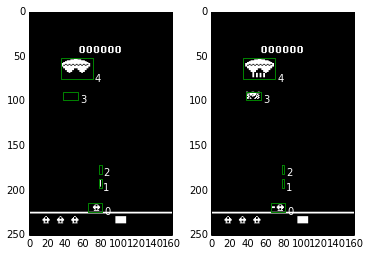

Join (0,), Shift [-0.0, 2.0], Score 0.408248290464
Join (1,), Shift [5.0, 1.0], Score 1
Join (2,), Shift [5.0, 1.0], Score 1
Join (3,), Shift [5.0, 9.0], Score 1
Join (4,), Shift [0.0, 2.0], Score 0.471404520791
Join (0, 1), Shift [-0.0, 2.0], Score 0.534522483825
Join (0, 2), Shift [-0.0, 2.0], Score 0.612372435696
Join (0, 3), Shift [0.0, 2.0], Score 0.841444708273
Join (0, 4), Shift [-0.0, 2.0], Score 0.657401442158
Join (1, 2), Shift [10.0, 0.0], Score 0.0
Join (1, 3), Shift [-17.0, 1.0], Score 1
Join (1, 4), Shift [-0.0, 2.0], Score 0.692498305663
Join (2, 3), Shift [48.0, 22.0], Score 1
Join (2, 4), Shift [0.0, 2.0], Score 0.680882906649
Join (3, 4), Shift [0.0, 2.0], Score 0.824621125124
Join (0, 1, 2), Shift [-0.0, 2.0], Score 0.612372435696
Join (0, 1, 3), Shift [0.0, 2.0], Score 0.841444708273
Join (0, 1, 4), Shift [-0.0, 2.0], Score 0.657401442158
Join (0, 2, 3), Shift [0.0, 2.0], Score 0.841444708273
Join (0, 2, 4), Shift [-0.0, 2.0], Score 0.657401442158
Join (0, 3, 4), Sh

j: 15
len(params_k): 16
Examining join (3,), for box 3
Examining join (0, 3), for box 3
Examining join (1, 3), for box 3
Deleted join (1, 3), for box 3
j: 2
len(params_k): 16
Examining join (2, 3), for box 3
Deleted join (2, 3), for box 3
j: 3
len(params_k): 16
Examining join (3, 4), for box 3
Examining join (0, 1, 3), for box 3
Deleted join (0, 1, 3), for box 3
j: 5
len(params_k): 16
Examining join (0, 2, 3), for box 3
Deleted join (0, 2, 3), for box 3
j: 6
len(params_k): 16
Examining join (0, 3, 4), for box 3
Examining join (1, 2, 3), for box 3
Deleted join (1, 2, 3), for box 3
j: 8
len(params_k): 16
Examining join (1, 3, 4), for box 3
Deleted join (1, 3, 4), for box 3
j: 9
len(params_k): 16
Examining join (2, 3, 4), for box 3
Deleted join (2, 3, 4), for box 3
j: 10
len(params_k): 16
Examining join (0, 1, 2, 3), for box 3
Deleted join (0, 1, 2, 3), for box 3
j: 11
len(params_k): 16
Examining join (0, 1, 3, 4), for box 3
Deleted join (0, 1, 3, 4), for box 3
j: 12
len(params_k): 16
Exa

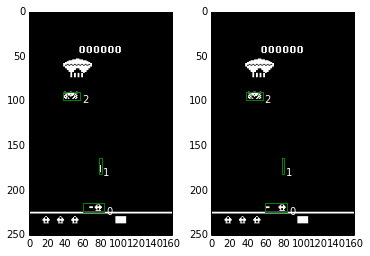

Join (0,), Shift [-0.0, 1.0], Score 0.845154254729
Join (1,), Shift [-8.0, 0.0], Score 0.0
Join (2,), Shift [-0.0, 2.0], Score 0.0
Join (0, 1), Shift [0.0, 2.0], Score 0.666666666667
Join (0, 2), Shift [0.0, 2.0], Score 0.461880215352
Join (1, 2), Shift [-0.0, 2.0], Score 0.412568498504
Join (0, 1, 2), Shift [0.0, 2.0], Score 0.461880215352

Starting . . . 


self.cnt_best_params: {}
len(self.cnts): 3
winner: 1
winner params: [(1,), [-8.0, 0.0]]
forbidden_inds: set([1])
cnt_scores_remaining :{0: [0.84515425472851657, 0.66666666666666663, 0.4618802153517006, 0.4618802153517006], 1: [0.0, 0.66666666666666663, 0.41256849850351734, 0.4618802153517006], 2: [0.0, 0.4618802153517006, 0.41256849850351734, 0.4618802153517006]}

cnt_score_params_remaining :{0: [[(0,), [-0.0, 1.0]], [(0, 1), [0.0, 2.0]], [(0, 2), [0.0, 2.0]], [(0, 1, 2), [0.0, 2.0]]], 1: [[(1,), [-8.0, 0.0]], [(0, 1), [0.0, 2.0]], [(1, 2), [-0.0, 2.0]], [(0, 1, 2), [0.0, 2.0]]], 2: [[(2,), [-0.0, 2.0]], [(0, 2), [0.0, 2.0]], [(1,

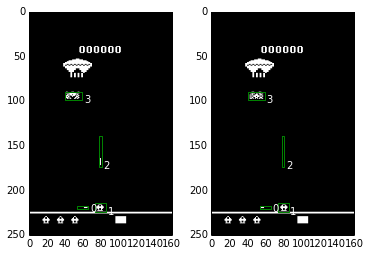

Join (0,), Shift [-0.0, 6.0], Score 0.0
Join (1,), Shift [-0.0, 2.0], Score 0.0
Join (2,), Shift [12.0, 0.0], Score 0.707106781187
Join (3,), Shift [0.0, 0.0], Score 1
Join (0, 1), Shift [0.0, -6.0], Score 0.0
Join (0, 2), Shift [0.0, -6.0], Score 0.721110255093
Join (0, 3), Shift [0.0, 2.0], Score 1
Join (1, 2), Shift [-0.0, 2.0], Score 0.666666666667
Join (1, 3), Shift [1.0, 4.0], Score 1
Join (2, 3), Shift [0.0, 0.0], Score 1
Join (0, 1, 2), Shift [0.0, -6.0], Score 0.721110255093
Join (0, 1, 3), Shift [1.0, 1.0], Score 1
Join (0, 2, 3), Shift [0.0, 1.0], Score 1
Join (1, 2, 3), Shift [1.0, 4.0], Score 1
Join (0, 1, 2, 3), Shift [0.0, 1.0], Score 1

Starting . . . 


self.cnt_best_params: {}
len(self.cnts): 4
winner: 0
winner params: [(0,), [-0.0, 6.0]]
forbidden_inds: set([0])
cnt_scores_remaining :{0: [0.0, 0.0, 0.7211102550927978, 1, 0.7211102550927978, 1, 1, 1], 1: [0.0, 0.0, 0.66666666666666663, 1, 0.7211102550927978, 1, 1, 1], 2: [0.70710678118654746, 0.7211102550927978, 0.666

In [499]:
num_steps = 5
img_dir = 'img/'
mt = play(num_steps, env, img_dir, num_wait_steps, )
fp = mt.frame_pairs
frame_thresh = [f.thresh for f in fp]

print mt.game_id


 Frame: 0


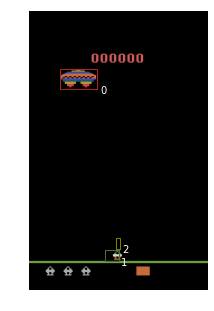


 Frame: 1


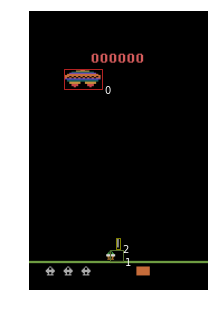


 Frame: 2


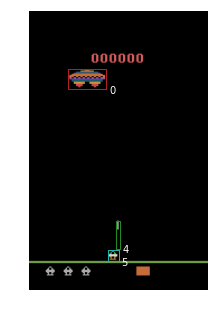


 Frame: 3


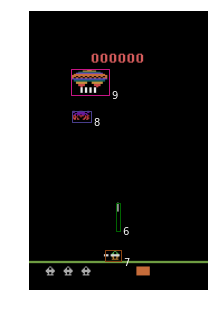


 Frame: 4


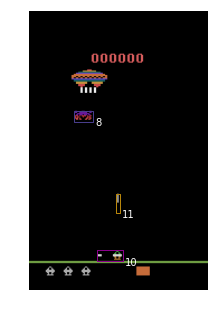


 Frame: 5


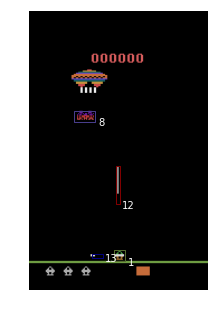

In [500]:
for i in range(mt.cur_frame):
    print '\n Frame: ' + str(i)
    #print 'Action: ' + str(mt.action_hist[i]) + '\n'
    fig = plt.figure(figsize=(12,5))

    movers_cur_frame = []
    for m in mt.movers:
        cur_frame_pos = filter(lambda p: p[0]==i, m.trajectory)
        if len(cur_frame_pos) > 0:
            movers_cur_frame.append((m.id, cur_frame_pos[0][1]))
        
    ax = plt.gca()
    plt.axis('off')
    if i == 0:
        plt.imshow(fp[i].s0)
    else:
        plt.imshow(fp[i-1].s1)
    for data in movers_cur_frame:
        m_id = data[0]
        box = data[1]
        ax.add_patch(patches.Rectangle((box.ll.x, box.ll.y),
                                    box.width, box.height,
                                    color=box_colors[m_id+1],
                                    fill=False)
            )
        plt.text(box.ur.x+3, box.ur.y+3, str(m_id),color='w')
    plt.show()


 Frame: 0


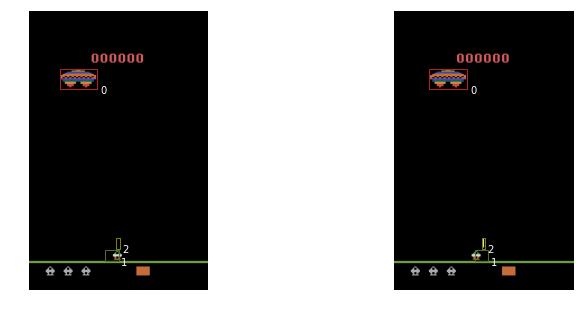


 Frame: 1


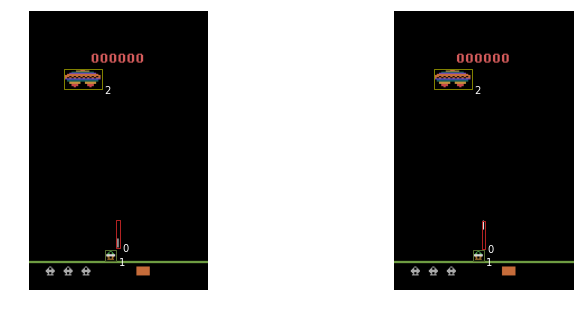


 Frame: 2


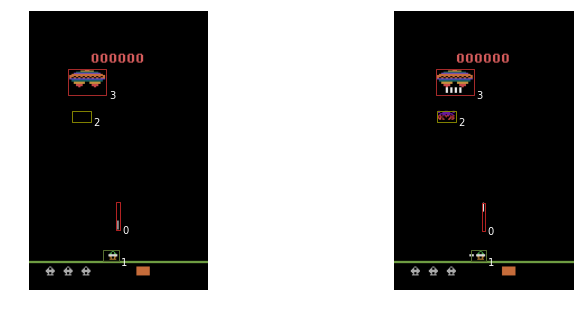


 Frame: 3


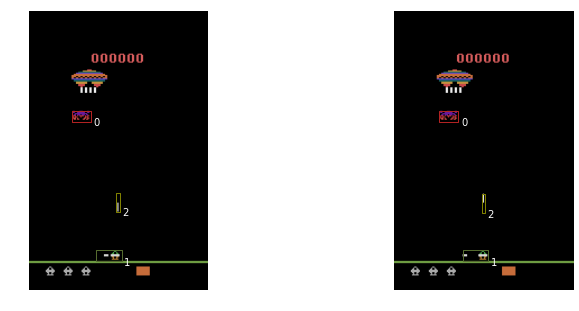


 Frame: 4


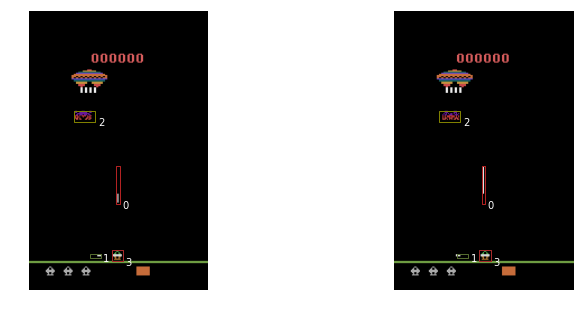

In [501]:
for i in range(mt.cur_frame-1):
    print '\n Frame: ' + str(i)
    #print 'Action: ' + str(mt.action_hist[i]) + '\n'
    fig = plt.figure(figsize=(12,5))

    movers_cur_frame = []
    for m in mt.movers:
        cur_frame_pos = filter(lambda p: p[0]==i, m.trajectory)
        if len(cur_frame_pos) > 0:
            movers_cur_frame.append((m.id, cur_frame_pos[0][1]))
    ax = fig.add_subplot(121)
    plt.axis('off')
    plt.imshow(fp[i].s0)
    finder = fp[i].finder
    for m_id, boxes in enumerate(finder.mover_boxes):
        box = boxes[0]
        ax.add_patch(patches.Rectangle((box.ll.x, box.ll.y),
                                    box.width, box.height,
                                    color=box_colors[m_id+1],
                                    fill=False)
            )
        plt.text(box.ur.x+3, box.ur.y+3, str(m_id),color='w')
    ax = fig.add_subplot(122)
    plt.axis('off')
    plt.imshow(fp[i].s1)
    for m_id, boxes in enumerate(finder.mover_boxes):
        box = boxes[1]
        ax.add_patch(patches.Rectangle((box.ll.x, box.ll.y),
                                    box.width, box.height,
                                    color=box_colors[m_id+1],
                                    fill=False)
            )
        plt.text(box.ur.x+3, box.ur.y+3, str(m_id),color='w')
    plt.show()

In [74]:
print mt.movers[1].trajectory
print mt.movers[2].trajectory

[[0, (139-142, 121-125)], [1, (142-145, 125-129)]]
[[2, (135-141, 125-133)], [3, (133-139, 127-135)], [4, (131-137, 129-137)], [5, (127-133, 133-141)], [6, (123-129, 137-145)], [7, (120-126, 140-148)], [8, (116-122, 144-152)], [9, (113-119, 147-155)], [10, (109-115, 151-159)]]


In [64]:
print fp[2].mover_boxes[1][1]
print fp[3].mover_boxes[1][0]

print (fp[2].mover_boxes[1][1].ll).sq_dist(fp[3].mover_boxes[1][0].ll)
print (fp[2].mover_boxes[1][1].ur).sq_dist(fp[3].mover_boxes[1][0].ur)

(17-20, 124-128)
(14-20, 120-128)
25
0


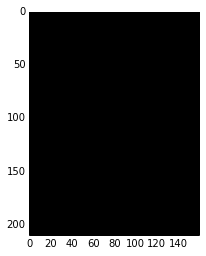

In [58]:
plt.imshow(fp[3].s0 - fp[2].s1)

In [35]:
s0s = [f.s0 for f in fp]
s1s = [f.s1 for f in fp]

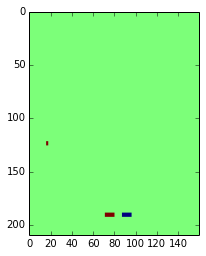

In [37]:
ii = 2

f0 = cv2.cvtColor(fp[ii].s0, cv2.COLOR_BGR2GRAY).astype('float32')
f1 = cv2.cvtColor(fp[ii].s1, cv2.COLOR_BGR2GRAY).astype('float32')
s0 = fp[ii].s0
s1 = fp[ii].s1

boxes = fp[ii].boxes

plt.imshow(f1-f0)

In [10]:
def join_cnts(cnts, inds):
    (x, y, w, h) = cv2.boundingRect(cnts[inds[0]])
    ll = Point(x,y)
    ur = Point(x+w,y+h)
    for ind in inds[1:]:
        (x, y, w, h) = cv2.boundingRect(cnts[ind]) 
        if x < ll.x:
            ll.x = x
        if x > ur.x:
            ur.x = x
        if y < ll.y:
            ll.y = y
        if y > ur.y:
            ur.y = y
    return Box(ll,ur)

In [11]:
frame_diff = fp[ii].s1 - fp[ii].s0
fd_grey = cv2.cvtColor(frame_diff, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(fd_grey,1,255,cv2.THRESH_BINARY)[1]
thresh_dilated = cv2.dilate(thresh,None,iterations=1)
(cnts, _) = cv2.findContours(thresh_dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

from itertools import combinations
all_joins = [c \
 for l in range(1,len(cnts)+1) \
 for c in combinations(range(len(cnts)),l)\
]

cnts_joined = [join_cnts(cnts,inds) for inds in all_joins] 

'''
for i, c in enumerate(cnts_joined):
    (x, y, w, h) = (c.ll.x, c.ll.y, c.width, c.height)
    plt.imshow(thresh_dilated,cmap='gray')
    ax = plt.gca()
    plt.axis([0, 159, 209, 0])
    ax.add_patch(patches.Rectangle((x,y),w,h,color='g',fill=False))
    plt.show()
'''

"\nfor i, c in enumerate(cnts_joined):\n    (x, y, w, h) = (c.ll.x, c.ll.y, c.width, c.height)\n    plt.imshow(thresh_dilated,cmap='gray')\n    ax = plt.gca()\n    plt.axis([0, 159, 209, 0])\n    ax.add_patch(patches.Rectangle((x,y),w,h,color='g',fill=False))\n    plt.show()\n"

In [12]:
def generate_translate(f0, f1, shifts, debug=False):
    out = np.zeros(f0.shape)
    #out = f1.copy()
    n_changed = 0
    for i in range(shifts.shape[0]):
        for j in range(shifts.shape[1]):
            try:
                x_out_float = (i+shifts[i,j,0])# % out.shape[0]
                y_out_float = (j+shifts[i,j,1])# % out.shape[1]
                
                #frac_x = x_out_float - int(x_out_float)
                #frac_y = y_out_float - int(y_out_float)

                x_out = np.round(x_out_float).astype(int) % out.shape[0]
                y_out = np.round(y_out_float).astype(int) % out.shape[1]
                
                out[x_out,y_out,:] = f0[i,j,:]
                #out[x_out,y_out,:] = (1-frac_x)*(1-frac_y)*f0[i,j,:]
                #out[x_out+1,y_out,:] += (frac_x)*(1-frac_y)*f0[i,j,:]
                #out[x_out,y_out+1,:] += (1-frac_x)*(frac_y)*f0[i,j,:]
                #out[x_out+1,y_out+1,:] += (frac_x)*(frac_y)*f0[i,j,:]
                n_changed += 1
            except IndexError:
                pass
    if debug:
        return out, n_changed
    else:
        return out

In [13]:
all_joins

[(0,), (1,), (0, 1)]

0 

0.0

0.0

[0.0, -17.0] 



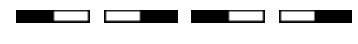

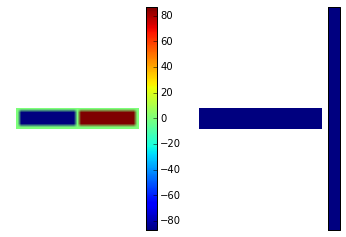

1 

0.0

0.0

[3.0, -3.0] 



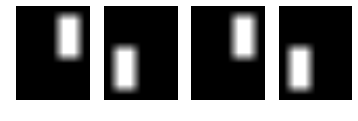

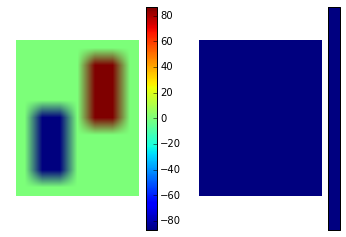

2 

0.333333333333

0.333333333333

[0.0, -17.0] 



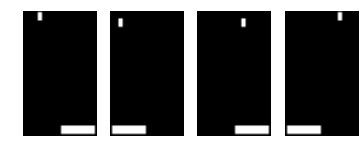

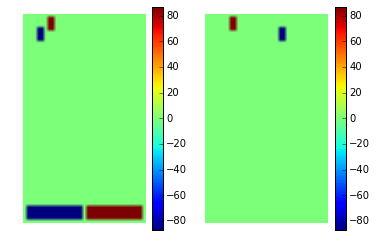

In [23]:
cnt_scores = {i: [] for i in range(len(cnts))}
cnt_score_params = {i: [] for i in range(len(cnts))}
for box_id, box in enumerate(cnts_joined):
    print box_id, '\n'
    box0 = Box(box.ll, box.ur)
    box1 = Box(box.ll, box.ur)
    # grayscale
    box0.add_image(f0)
    box1.add_image(f1)

    box0_1channel = np.expand_dims(box0.img,2)
    box1_1channel = np.expand_dims(box1.img,2)
    
    shifts = np.zeros((f0.shape[0],f0.shape[1],2))
    pc = cv2.phaseCorrelate(box0.img,box1.img)
    four_shifts = [[np.floor(pc[1]),np.floor(pc[0])],\
                   [np.ceil(pc[1]),np.floor(pc[0])],\
                   [np.floor(pc[1]),np.ceil(pc[0])],\
                   [np.ceil(pc[1]),np.ceil(pc[0])]
                  ]
    best_ratio = 1
    
    best_shift = four_shifts[0]
    for s in four_shifts:
        shifts[:,:,0] = s[0]
        shifts[:,:,1] = s[1]

        synth_box1 = generate_translate(box0_1channel,box1_1channel,shifts)
        synth_box0 = generate_translate(box1_1channel,box0_1channel,-shifts)

        ratio0 = score(box0_1channel,box1_1channel,shifts)/score(box0_1channel,box1_1channel,0*shifts)
        ratio1 = score(box1_1channel,box0_1channel,-shifts)/score(box1_1channel,box0_1channel,-0*shifts)

        ratio_s = max(ratio0,ratio1)
        if ratio_s < best_ratio:
            best_shift = s
            best_ratio = ratio_s
    
    s = best_shift
    for ind in all_joins[box_id]:
        cnt_scores[ind].append(best_ratio)
        cnt_score_params[ind].append([all_joins[box_id], s])
    
    shifts[:,:,0] = s[0]
    shifts[:,:,1] = s[1]

    synth_box1 = generate_translate(box0_1channel,box1_1channel,shifts)
    synth_box0 = generate_translate(box1_1channel,box0_1channel,-shifts)

    ratio0 = score(box0_1channel,box1_1channel,shifts)/score(box0_1channel,box1_1channel,0*shifts)
    ratio1 = score(box1_1channel,box0_1channel,-shifts)/score(box1_1channel,box0_1channel,-0*shifts)

    print ratio0
    print ''
    print ratio1
    print ''

    print s, '\n'

    plt.figure()
    plt.subplot(141)
    plt.axis('off')
    plt.imshow(box0.img,cmap='gray')
    plt.subplot(142)
    plt.axis('off')
    plt.imshow(box1.img,cmap='gray')
    plt.subplot(143)
    plt.axis('off')
    plt.imshow(synth_box0.squeeze(),cmap='gray')
    plt.subplot(144)
    plt.axis('off')
    plt.imshow(synth_box1.squeeze(),cmap='gray')

    plt.figure()
    plt.subplot(121)
    plt.axis('off')
    plt.imshow(box0.img - box1.img)
    plt.colorbar()
    plt.subplot(122)
    plt.axis('off')
    plt.imshow(box0.img - synth_box0.squeeze())
    plt.colorbar()

    plt.show()

In [27]:
print cnt_scores
print cnt_score_params

print cnt_scores_remaining

{0: [0.33333333333333331], 1: []}
{0: [[(0, 1), [0.0, -17.0]]], 1: []}
{}


In [26]:
pdb.set_trace()
cnt_best_params = {}
cnt_scores_remaining = cnt_scores.copy()
cnt_score_params_remaining = cnt_score_params.copy()

while len(cnt_best_params) < len(cnts):
    best_scores_cnts = {k: min(v) \
                        for k, v in cnt_scores_remaining.iteritems()}
    winning_index = np.argmin(best_scores_cnts.values())
    winner = best_scores_cnts.keys()[winning_index]
    winner_best_index = np.argmin(cnt_scores_remaining[winner])
    cnt_best_params[winner] = cnt_score_params[winner][winner_best_index]
    print cnt_scores_remaining, '\n'
    print cnt_score_params_remaining, '\n\n'
    forbidden_inds = set(cnt_best_params[winner][0])
    for k in cnt_scores_remaining:
        scores_k = cnt_scores_remaining[k]
        for j, sc in enumerate(scores_k):
            join_k_j = cnt_score_params_remaining[k][j][0]
            if len(forbidden_inds & set(join_k_j)) > 0:
                del cnt_scores_remaining[k][j]
                del cnt_score_params_remaining[k][j]
    cnt_scores_remaining.pop(winner)
cnt_best_params 

--Return--
> <ipython-input-26-f10763143cf1>(1)<module>()->None
-> pdb.set_trace()
(Pdb) s
> //anaconda/envs/tensorflow/lib/python2.7/site-packages/IPython/core/interactiveshell.py(2884)run_code()
-> sys.excepthook = old_excepthook
(Pdb) s
> //anaconda/envs/tensorflow/lib/python2.7/site-packages/IPython/core/interactiveshell.py(2900)run_code()
-> outflag = 0
(Pdb) n
> //anaconda/envs/tensorflow/lib/python2.7/site-packages/IPython/core/interactiveshell.py(2901)run_code()
-> return outflag
(Pdb) n
--Return--
> //anaconda/envs/tensorflow/lib/python2.7/site-packages/IPython/core/interactiveshell.py(2901)run_code()->0
-> return outflag
(Pdb) n
> //anaconda/envs/tensorflow/lib/python2.7/site-packages/IPython/core/interactiveshell.py(2818)run_ast_nodes()
-> for i, node in enumerate(to_run_exec):
(Pdb) c
{0: [0.0, 0.33333333333333331], 1: [0.0, 0.33333333333333331]} 

{0: [[(0,), [0.0, -17.0]], [(0, 1), [0.0, -17.0]]], 1: [[(1,), [3.0, -3.0]], [(0, 1), [0.0, -17.0]]]} 


{1: [0.0]} 

{0: [[(0,

{0: [(0,), [0.0, -17.0]], 1: [(1,), [3.0, -3.0]]}

In [86]:
cnt_best_params = {}
for cnt_id in cnt_scores:
    best_index = np.argmin(cnt_scores[cnt_id])
    cnt_best_params[cnt_id] = cnt_score_params[cnt_id][best_index]
cnt_best_params

{0: [(0,), [-0.0, -15.0]], 1: [(0, 1), [0.0, -15.0]]}

In [83]:
mover_joins = set()
mover_shifts = {}
for c in cnt_best_params.values():
    mover_joins.add(c[0])
    mover_shifts[c[0]] = Point(int(c[1][1]),int(c[1][0]))
mover_boxes = {inds: join_cnts(cnts,inds) for inds in mover_joins}

(-15, 0)
(82.0, 158.5)
(67.0, 158.5)
(-15.0, 0.0)


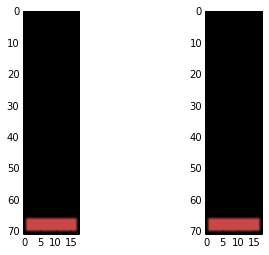

(-15, 0)
(82.0, 191.0)
(67.0, 191.0)
(-15.0, 0.0)


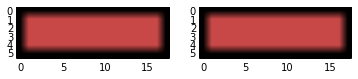

In [84]:
for ind in mover_boxes:
    box = mover_boxes[ind]
    shift = mover_shifts[ind]
    # delete line below later
    shift = Point(shift.x, shift.y)
    print shift
    n_shift = -shift
    box0 = Box(box.ll-shift.thresh(-1), box.ur-shift.thresh(1))
    box1 = Box(box.ll-n_shift.thresh(-1), box.ur-n_shift.thresh(1))
    print box0.center
    print box1.center
    print box1.center - box0.center
    box0.add_image(s0)
    box1.add_image(s1)
    plt.subplot(121)
    plt.imshow(box0.img)
    plt.subplot(122)
    plt.imshow(box1.img)
    plt.show()

In [15]:
def score(f0, f1, shifts):
    err = f1 - generate_translate(f0, f1, shifts)
    return np.sqrt(sum(err.flatten()**2))

def start(f0, f1):
    diff = f1 - f0
    nz = diff.nonzero()
    rand_nz = np.random.randint(nz[0].shape[0])
    point = (nz[0][rand_nz], nz[1][rand_nz])

    scores = []
    inds = []
    s = np.zeros((s0.shape[0],s0.shape[1],2),dtype=int)
    for i in range(-3,4):
        for j in range(-3,4):
            s[point[0], point[1], 0] = i
            s[point[0], point[1], 0] = j
            inds.append((i,j))
            scores.append(score(f0, f1, s))
    shift = inds[np.argmin(scores)]
    s = np.zeros((s0.shape[0],s0.shape[1],2),dtype=int)
    s[point[0], point[1], 0] = shift[0]
    s[point[0], point[1], 1] = shift[1]
    print score(f0, f1, s)
    return shift

def expand(f0, f1, shift):
    diff = f1 - f0
    nz = diff.nonzero()
    s = np.zeros((s0.shape[0],s0.shape[1],2),dtype=int)
    for ind in range(nz[0].shape[0]-1):
        i = nz[0][ind]
        j = nz[1][ind]
        s[i,j,0] = shift[0]
        s[i,j,1] = shift[1]
    s[:,:,0] = shift[0]
    s[:,:,1] = shift[1]
    print score(f0, f1, s)
    return s

In [735]:

mhi = np.zeros(frame_thresh[0].shape,dtype=np.float32)

f_gray = cv2.cvtColor(fp[0].s0, cv2.COLOR_BGR2GRAY)
cv2.updateMotionHistory(f_gray,mhi,1,10)

for i, f in enumerate(fp):
    f_gray = cv2.cvtColor(f.s1, cv2.COLOR_BGR2GRAY)
    cv2.updateMotionHistory(f_gray,mhi,i+2,10)

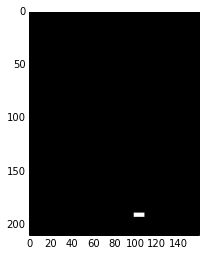

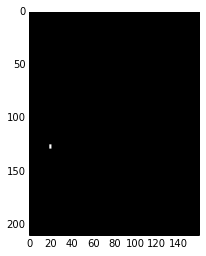

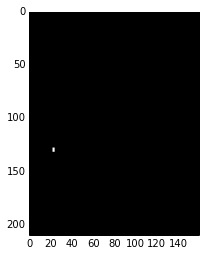

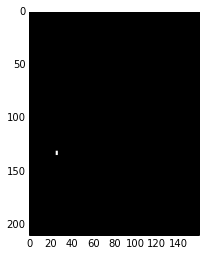

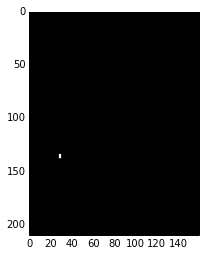

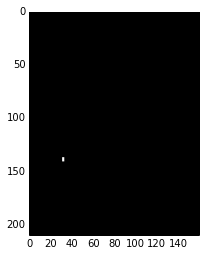

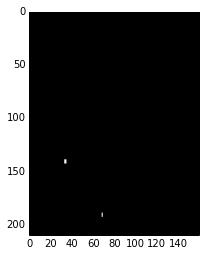

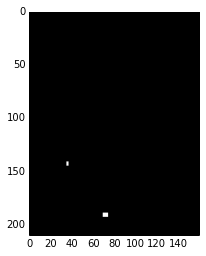

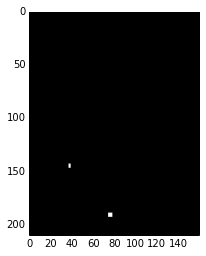

In [470]:
for i in range(1,10):
    mhi2 = mhi.copy()
    mhi2[mhi2 != i] = 0
    plt.imshow(mhi2,cmap='gray')
    plt.show()

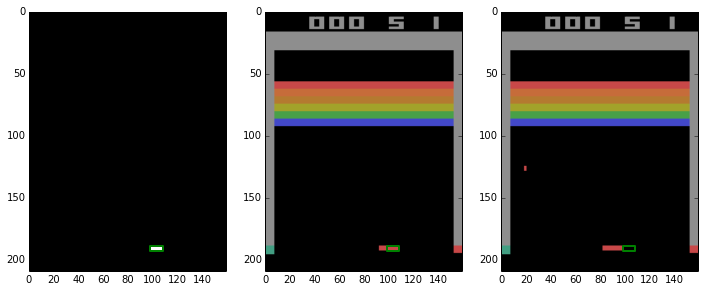

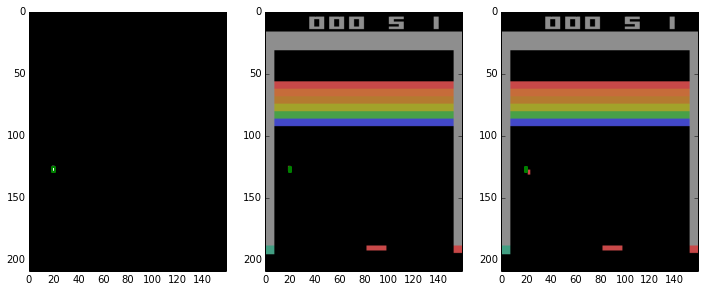

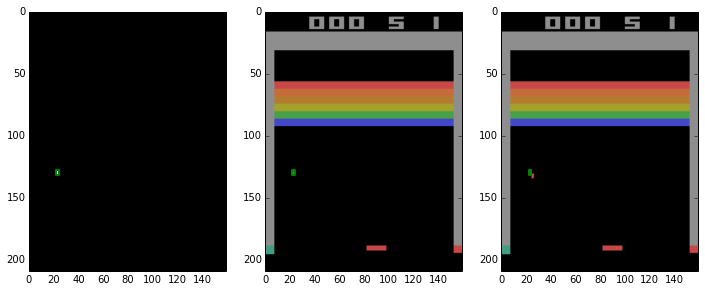

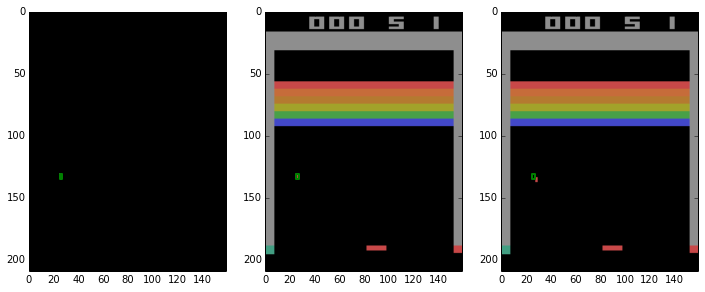

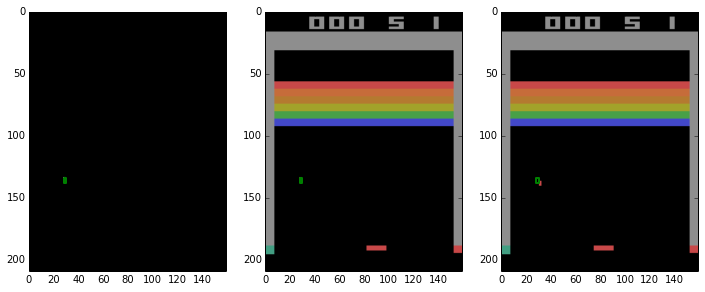

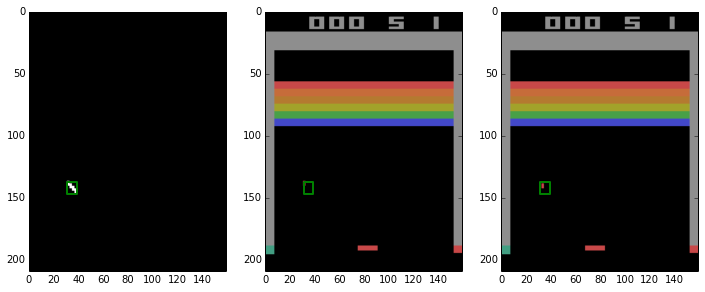

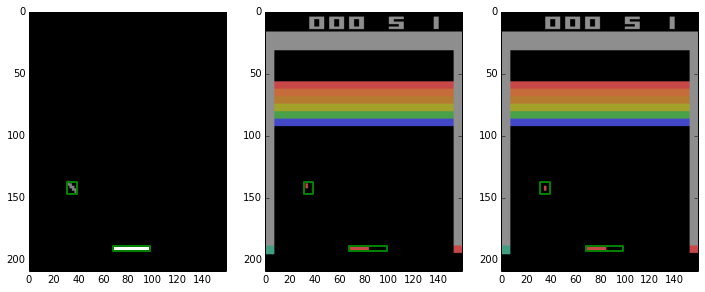

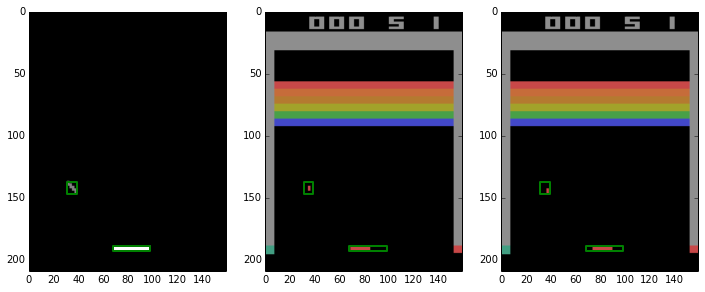

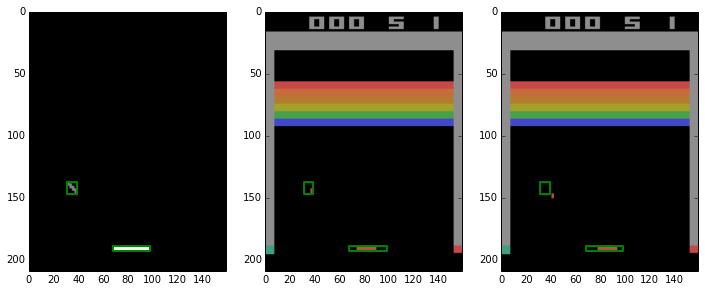

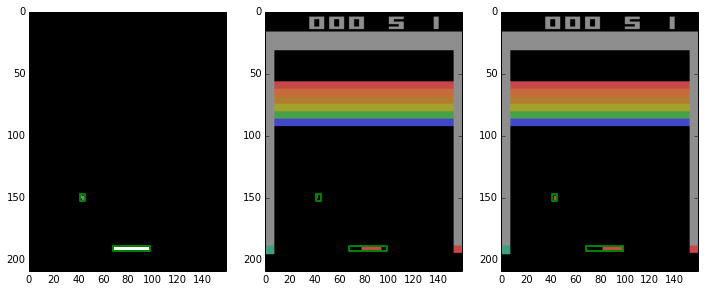

IndexError: list index out of range

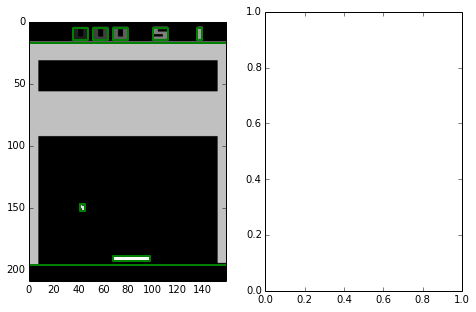

In [458]:
mg_mask, mg_orient = cv2.calcMotionGradient(mhi,1,3)

for i in range(len(frame_thresh)+1):
    seg_mask, seg_bounds = \
    cv2.segmentMotion(mhi, i+1, 2)
    
    plt.figure(figsize=(12,5))
    ax = plt.subplot(131)
    plt.imshow(seg_mask,cmap='gray')
    plt.axis([0, 159, 209, 0])
    for rect in seg_bounds:
        x, y, rw, rh = rect
        silh_roi   = frame_thresh[1][y:y+rh,x:x+rw]
        orient_roi = mg_orient     [y:y+rh,x:x+rw]
        mask_roi   = mg_mask       [y:y+rh,x:x+rw]
        mhi_roi    = mhi           [y:y+rh,x:x+rw]

        angle = cv2.calcGlobalOrientation(orient_roi, mask_roi, mhi_roi, 2, 10)

        ax.add_patch(patches.Rectangle((x,y),rw,rh,fill=False,
                                       color='g',
                                      lw=2))
    ax = plt.subplot(132)
    plt.imshow(s0s[i])
    plt.axis([0, 159, 209, 0])
    for rect in seg_bounds:
        x, y, rw, rh = rect
        silh_roi   = frame_thresh[1][y:y+rh,x:x+rw]
        orient_roi = mg_orient     [y:y+rh,x:x+rw]
        mask_roi   = mg_mask       [y:y+rh,x:x+rw]
        mhi_roi    = mhi           [y:y+rh,x:x+rw]

        angle = cv2.calcGlobalOrientation(orient_roi, mask_roi, mhi_roi, 2, 10)

        ax.add_patch(patches.Rectangle((x,y),rw,rh,fill=False,
                                       color='g',
                                      lw=2))
    ax = plt.subplot(133)
    plt.imshow(s1s[i])
    plt.axis([0, 159, 209, 0])
    for rect in seg_bounds:
        x, y, rw, rh = rect
        silh_roi   = frame_thresh[1][y:y+rh,x:x+rw]
        orient_roi = mg_orient     [y:y+rh,x:x+rw]
        mask_roi   = mg_mask       [y:y+rh,x:x+rw]
        mhi_roi    = mhi           [y:y+rh,x:x+rw]

        angle = cv2.calcGlobalOrientation(orient_roi, mask_roi, mhi_roi, 2, 10)

        ax.add_patch(patches.Rectangle((x,y),rw,rh,fill=False,
                                       color='g',
                                      lw=2))
    plt.show()

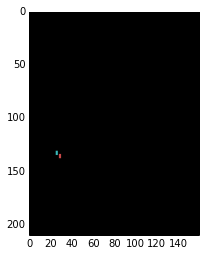

In [416]:
i=3
s0=s0s[i]
s1=s0s[i+1]

s0_gray = cv2.cvtColor(s0, cv2.COLOR_BGR2GRAY)
s1_gray = cv2.cvtColor(s1, cv2.COLOR_BGR2GRAY)

plt.imshow(s1-s0)

In [310]:
shift

(-3, -1)

159.342398626
159.342398626
638.967917817


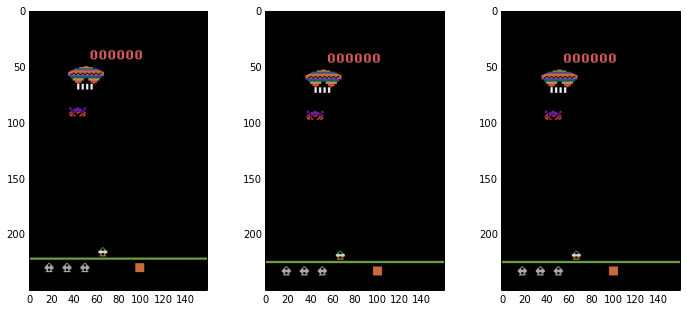

In [309]:
shift = start(s0,s1)
print score(s0, s1, np.zeros((s0.shape[0],s0.shape[1],2),dtype=int))
s = expand(s0, s1, shift)
plt.figure(figsize=(12,5))
plt.subplot(131)
plt.imshow(generate_translate(s0, s1, s))
plt.subplot(132)
plt.imshow(s0)
plt.subplot(133)
plt.imshow(s1)

In [160]:
s = 0*np.ones((s0.shape[0],s0.shape[1],2),dtype=int)
s[:,:,0]=0

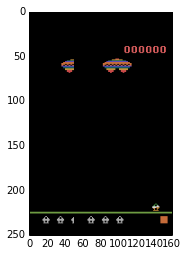

In [157]:
plt.imshow(generate_translate(s0, s1, s))

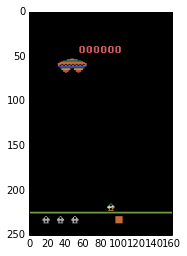

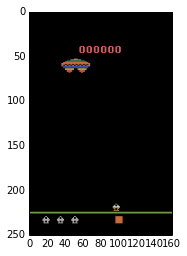

In [153]:
plt.imshow(s0)
plt.show()
plt.imshow(s1)
plt.show()